# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from random import choice

%matplotlib inline

## Input data

In [2]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


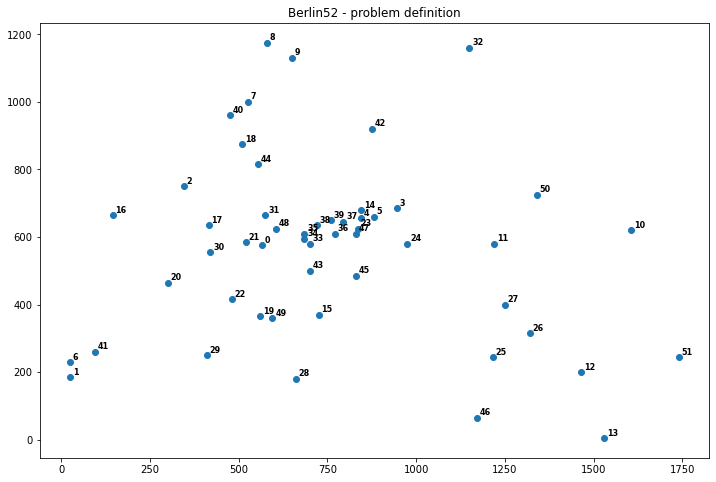

In [3]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

<Figure size 864x576 with 0 Axes>

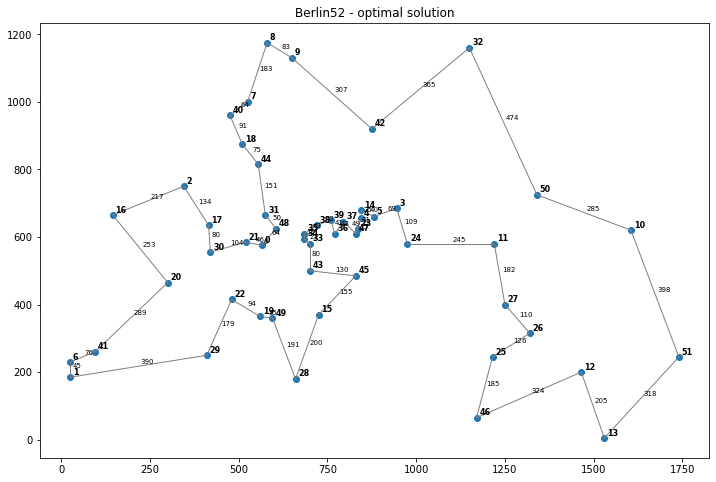

In [4]:
from matplotlib.lines import Line2D

route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

## Objective function

In [5]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

In [6]:
print(tsp_objective_function(p), p)

7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


## Random Sampling

In [7]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = tsp_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(tsp_objective_function(p), p)

30.10232949256897
21936.25764343246 [33 34 10 21 39 49 35  6 16 17 27 25 46 22 26 51 50 32 44 24 11 14  5 43
 48  0 47 19 20 29  1  7 13 12  3 37 36  4 40 41 38 18  2 30 28 23 15 45
 31 42  9  8]


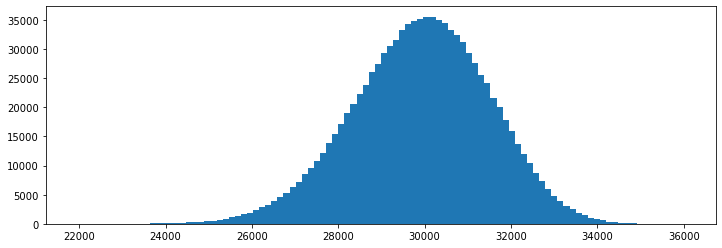

29913.023255716293 1578.607445393111


In [8]:
plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [9]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [10]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = tsp_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = tsp_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

23.503382921218872 9094.381677426543


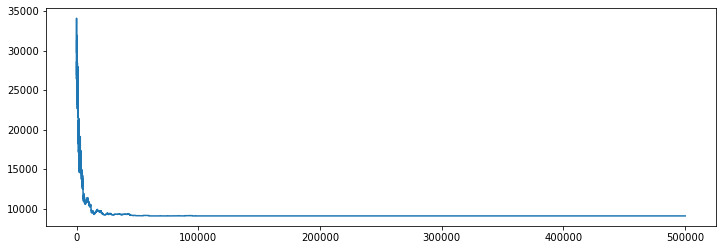

In [11]:
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

## SGA-PMX

In [12]:
def PMX(par1, par2):
    
    # randomly selecting separators
    s1_idx = choice([s for s in range(1, n)])
    s2_idx = choice([s for s in range(1, n) if s not in [s1_idx-1, s1_idx, s1_idx+1]])
    if s1_idx > s2_idx:
        s1_idx, s2_idx = s2_idx, s1_idx
    s1 = n
    s2 = n + 1
    par1 = np.insert(par1, s1_idx, s1)
    par1 = np.insert(par1, s2_idx + 1, s2)
    par2 = np.insert(par2, s1_idx, s1)
    par2 = np.insert(par2, s2_idx + 1, s2)
    
    #randomly selecting group number
    group = choice([g for g in range(0, 3)])
    
    #initializing kids with separators 
    kid1 = np.ones(n) * -1
    kid2 = np.ones(n) * -1
    kid1 = np.insert(kid1, s1_idx, s1)
    kid1 = np.insert(kid1, s2_idx + 1, s2)
    kid2 = np.insert(kid2, s1_idx, s1)
    kid2 = np.insert(kid2, s2_idx + 1, s2)
    
    #pmx operations depending on the drawn group
    if group == 0:
        #copying group elems
        kid2[:s1_idx] = par1[:s1_idx]
        kid1[:s1_idx] = par2[:s1_idx]
        #adding elems that are not causing conflicts
        cop1 = par1[:s1_idx]
        cop2 = par2[:s1_idx]
        for i in range(s1_idx + 1, n + 2):
            if par2[i] not in cop1:
                kid2[i] = par2[i]
            if par1[i] not in cop2:
                kid1[i] = par1[i]
        #completing remaining with matching sequence
        for i in range(s1_idx + 1, n + 2):
            if kid2[i] == -1:
                match = cop2[np.where(cop1 == par2[i])[0][0]]
                while match in cop1:
                    match = cop2[np.where(cop1 == match)[0][0]]
                kid2[i] = match
            if kid1[i] == -1:
                match = cop1[np.where(cop2 == par1[i])[0][0]]
                while match in cop2:
                    match = cop1[np.where(cop2 == match)[0][0]]
                kid1[i] = match
        
    elif group == 1:
        #copying group elems
        kid2[s1_idx+1:s2_idx+1] = par1[s1_idx+1:s2_idx+1]
        kid1[s1_idx+1:s2_idx+1] = par2[s1_idx+1:s2_idx+1]
        #adding elems that are not causing conflicts
        cop1 = par1[s1_idx+1:s2_idx+1]
        cop2 = par2[s1_idx+1:s2_idx+1]
        for i in range(0, s1_idx):
            if par2[i] not in cop1:
                kid2[i] = par2[i]
            if par1[i] not in cop2:
                kid1[i] = par1[i]
        for i in range(s2_idx + 2, n + 2):
            if par2[i] not in cop1:
                kid2[i] = par2[i]
            if par1[i] not in cop2:
                kid1[i] = par1[i]
        #completing remaining with matching sequence
        for i in range(0, s1_idx):
            if kid2[i] == -1:
                match = cop2[np.where(cop1 == par2[i])[0][0]]
                while match in cop1:
                    match = cop2[np.where(cop1 == match)[0][0]]
                kid2[i] = match
            if kid1[i] == -1:
                match = cop1[np.where(cop2 == par1[i])[0][0]]
                while match in cop2:
                    match = cop1[np.where(cop2 == match)[0][0]]
                kid1[i] = match
        for i in range(s2_idx + 2, n + 2):
            if kid2[i] == -1:
                match = cop2[np.where(cop1 == par2[i])[0][0]]
                while match in cop1:
                    match = cop2[np.where(cop1 == match)[0][0]]
                kid2[i] = match
            if kid1[i] == -1:
                match = cop1[np.where(cop2 == par1[i])[0][0]]
                while match in cop2:
                    match = cop1[np.where(cop2 == match)[0][0]]
                kid1[i] = match
        
    else:
        #copying group elems
        kid2[s2_idx+2:] = par1[s2_idx+2:]
        kid1[s2_idx+2:] = par2[s2_idx+2:]
        #adding elems that are not causing conflicts
        cop1 = par1[s2_idx+2:]
        cop2 = par2[s2_idx+2:]
        for i in range(0, s2_idx + 1):
            if par2[i] not in cop1:
                kid2[i] = par2[i]
            if par1[i] not in cop2:
                kid1[i] = par1[i]
        #completing remaining with matching sequence
        for i in range(0, s2_idx + 1):
            if kid2[i] == -1:
                match = cop2[np.where(cop1 == par2[i])[0][0]]
                while match in cop1:
                    match = cop2[np.where(cop1 == match)[0][0]]
                kid2[i] = match
            if kid1[i] == -1:
                match = cop1[np.where(cop2 == par1[i])[0][0]]
                while match in cop2:
                    match = cop1[np.where(cop2 == match)[0][0]]
                kid1[i] = match

    #deleting separators
    kid1 = np.delete(kid1, s1_idx)
    kid1 = np.delete(kid1, s2_idx)
    kid2 = np.delete(kid2, s1_idx)
    kid2 = np.delete(kid2, s2_idx)
    
    return kid1, kid2

In [13]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [14]:
def SGA(cf, mf, N, pf):
    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25
    number_of_iterations = N

    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)
    print(np.random.permutation(chromosome_length))

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(current_population[i, :])
        
    if pf:
        costs = np.zeros(number_of_iterations)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                if cf == 0:
                    children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
                elif cf == 1:
                    children_population[2*i, :], children_population[2*i+1, :] = OX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
                else:
                    children_population[2*i, :], children_population[2*i+1, :] = CX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                if mf == 0:
                    children_population[i, :] = reverse_sequence_mutation(children_population[i, :])
                elif mf == 1:
                    children_population[i, :] = one_swap_mutation(children_population[i, :])
                elif mf == 2:
                    children_population[i, :] = k_swaps_mutation(children_population[i, :])
                else:
                    children_population[i, :] = half_mirror_mutation(children_population[i, :])              

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]
            
        if pf:
            costs[t] = objective_values[0]
        
        if pf:
            print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    if pf:   
        plt.figure()
        plt.plot(costs)
        plt.xlabel("iteration number")
        plt.ylabel("objective function value")
        plt.show()
    
    return objective_values[0]

[33 22  4 34  9 31 21  7 28  8 12 51 32 17 16 38 20 48  6 47 50  5 25 15
 13 18 10  3 46 19 23  0 40 27 39 41 36  2 35 30 29 26 49  1 24 37 11 14
 44 42 43 45]
  0     0.15062404 23477.13972697 28440.40491066 29801.35519197 1107.32616131
  1     0.27728510 23174.74166906 27301.25124255 28503.71760149 987.44160172
  2     0.40591335 21990.29449816 26380.91495604 27546.21563476 969.17086647
  3     0.54354572 21856.06829024 25582.72954487 26676.35052800 918.87918003
  4     0.67718768 20881.66371034 24816.17414692 25942.39157138 882.73809273
  5     0.81681466 19929.58220816 24089.33857778 25110.77569164 853.43074461
  6     0.94949079 19929.58220816 23382.40275764 24386.87258248 860.36859106
  7     1.07716107 19929.58220816 22593.48054648 23618.76998480 855.40752109
  8     1.20180869 18758.83672692 21918.42979697 22951.96825850 784.83826574
  9     1.32348704 18758.83672692 21319.07545801 22179.91952869 638.74983535
 10     1.44117594 18758.83672692 20796.18592958 21502.79479216 528.6

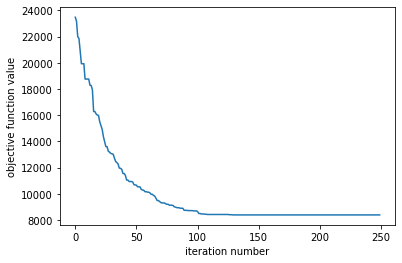

8388.513580967465

In [15]:
SGA(0, 0, 250, 1)

In [83]:
res = np.zeros(5)
for i in range(5):
    res[i] = SGA(0, 0, 250, 0)
print(res, np.mean(res))

[8027.91935922 8343.86167435 7783.55664156 8089.7199367  8413.82545622] 8131.7766136094315


In [85]:
def one_swap_mutation(p):
    q = p.copy()
    i, j = np.random.choice(len(p), 2, replace=False)
    q[i], q[j] = q[j], q[i]
    return q

  0     0.21446943 22951.52147666 28357.54541762 29677.76082413 1087.33213098
  1     0.42838287 22951.52147666 27266.01853601 28481.84310132 986.21762478
  2     0.62471271 21996.51833115 26394.00932159 27580.64122991 994.98551621
  3     0.83708310 21996.51833115 25515.44862944 26662.30340750 909.23231468
  4     1.02604294 20729.23385751 24862.57836776 25887.23947505 837.18069378
  5     1.23397660 20729.23385751 24311.07082531 25242.90739482 793.73639560
  6     1.41949749 19779.86961998 23683.89403355 24688.33104485 815.61051048
  7     1.60599399 19779.86961998 23176.65097094 24160.51766721 793.32631076
  8     1.78197932 19779.86961998 22585.94565632 23569.12399616 819.79525302
  9     1.95468974 19561.60390217 21943.05194029 22942.23567505 815.45251219
 10     2.12656426 19209.42481828 21187.20574558 22174.56856415 668.07336808
 11     2.30489802 18920.46453126 20590.24089446 21236.87012396 448.43852851
 12     2.47214985 17924.51748884 20190.11709985 20672.50467000 406.6445338

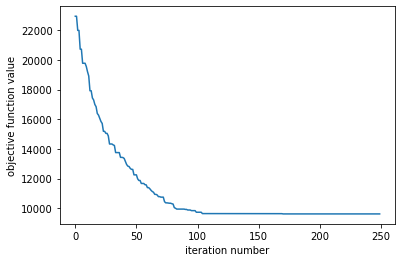

9615.21629533647

In [86]:
SGA(0, 1, 250, 1)

In [87]:
res = np.zeros(5)
for i in range(5):
    res[i] = SGA(0, 1, 250, 0)
print(res, np.mean(res))

[11020.79057814 10662.29576723 10606.57595667  9904.73341422
  9661.32230988] 10371.143605227855


### bayg29

In [88]:
bayg29_weights = ''' 97 205 139  86  60 220  65 111 115 227  95  82 225 168 103 266 205 149 120  58 257 152  52 180 136  82  34 145
129 103  71 105 258 154 112  65 204 150  87 176 137 142 204 148 148  49  41 211 226 116 197  89 153 124  74
219 125 175 386 269 134 184 313 201 215 267 248 271 274 236 272 160 151 300 350 239 322  78 276 220  60
167 182 180 162 208  39 102 227  60  86  34  96 129  69  58  60 120 119 192 114 110 192 136 173 173
 51 296 150  42 131 268  88 131 245 201 175 275 218 202 119  50 281 238 131 244  51 166  95  69
279 114  56 150 278  46 133 266 214 162 302 242 203 146  67 300 205 111 238  98 139  52 120
178 328 206 147 308 172 203 165 121 251 216 122 231 249 209 111 169  72 338 144 237 331
169 151 227 133 104 242 182  84 290 230 146 165 121 270  91  48 158 200  39  64 210
172 309  68 169 286 242 208 315 259 240 160  90 322 260 160 281  57 192 107  90
140 195  51 117  72 104 153  93  88  25  85 152 200 104 139 154 134 149 135
320 146  64  68 143 106  88  81 159 219  63 216 187  88 293 191 258 272
174 311 258 196 347 288 243 192 113 345 222 144 274 124 165  71 153
144  86  57 189 128  71  71  82 176 150  56 114 168  83 115 160
 61 165  51  32 105 127 201  36 254 196 136 260 212 258 234
106 110  56  49  91 153  91 197 136  94 225 151 201 205
215 159  64 126 128 190  98  53  78 218  48 127 214
 61 155 157 235  47 305 243 186 282 261 300 252
105 100 176  66 253 183 146 231 203 239 204
113 152 127 150 106  52 235 112 179 221
 79 163 220 119 164 135 152 153 114
236 201  90 195  90 127  84  91
273 226 148 296 238 291 269
112 130 286  74 155 291
130 178  38  75 180
281 120 205 270
213 145  36
 94 217
162'''
n = 29
A = np.zeros((n, n))
A[np.triu_indices(n, k=1)] = np.array([float(x) for x in bayg29_weights.split()])
A += A.T

In [197]:
p = [0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23]
print(tsp_objective_function(p), p)

1610.0 [0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23]


  0     0.14600754 3432.00000000 4395.63000000 4667.00000000 205.28364060
  1     0.28727078 3432.00000000 4188.77600000 4420.00000000 184.77990644
  2     0.42223573 3351.00000000 4038.14600000 4245.00000000 169.55681256
  3     0.55905890 3141.00000000 3900.08000000 4101.00000000 163.46883984
  4     0.70301628 3141.00000000 3779.41200000 3969.00000000 146.13664241
  5     0.82160878 2960.00000000 3695.89600000 3867.00000000 138.50008370
  6     0.95940804 2960.00000000 3606.67600000 3769.00000000 143.44060452
  7     1.09045625 2960.00000000 3524.17000000 3693.00000000 144.32208805
  8     1.22259402 2960.00000000 3453.82600000 3628.00000000 137.82609232
  9     1.35953259 2958.00000000 3387.35200000 3545.00000000 129.47789038
 10     1.48950338 2865.00000000 3306.63200000 3467.00000000 130.71858543
 11     1.60295391 2865.00000000 3232.77200000 3390.00000000 122.45730691
 12     1.73438764 2865.00000000 3149.01400000 3301.00000000 108.16258967
 13     1.86109161 2865.00000000 3075.

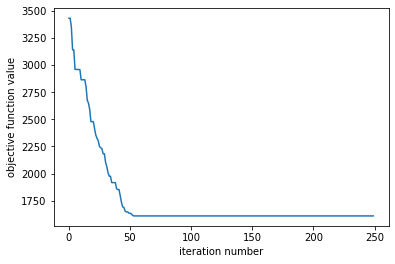

1610.0

In [89]:
# number_of_iterations = 250
SGA(0, 0, 250, 1)

In [90]:
res = np.zeros(5)
for i in range(5):
    res[i] = SGA(0, 0, 250, 0)
print(res, np.mean(res))

[1628. 1648. 1661. 1623. 1674.] 1646.8


### bays29

In [91]:
bays29_weights = '''   0 107 241 190 124  80 316  76 152 157 283 133 113 297 228 129 348 276 188 150  65 341 184  67 221 169 108  45 167
 107   0 148 137  88 127 336 183 134  95 254 180 101 234 175 176 265 199 182  67  42 278 271 146 251 105 191 139  79
 241 148   0 374 171 259 509 317 217 232 491 312 280 391 412 349 422 356 355 204 182 435 417 292 424 116 337 273  77
 190 137 374   0 202 234 222 192 248  42 117 287  79 107  38 121 152  86  68  70 137 151 239 135 137 242 165 228 205
 124  88 171 202   0  61 392 202  46 160 319 112 163 322 240 232 314 287 238 155  65 366 300 175 307  57 220 121  97
  80 127 259 234  61   0 386 141  72 167 351  55 157 331 272 226 362 296 232 164  85 375 249 147 301 118 188  60 185
 316 336 509 222 392 386   0 233 438 254 202 439 235 254 210 187 313 266 154 282 321 298 168 249  95 437 190 314 435
  76 183 317 192 202 141 233   0 213 188 272 193 131 302 233  98 344 289 177 216 141 346 108  57 190 245  43  81 243
 152 134 217 248  46  72 438 213   0 206 365  89 209 368 286 278 360 333 284 201 111 412 321 221 353  72 266 132 111
 157  95 232  42 160 167 254 188 206   0 159 220  57 149  80 132 193 127 100  28  95 193 241 131 169 200 161 189 163
 283 254 491 117 319 351 202 272 365 159   0 404 176 106  79 161 165 141  95 187 254 103 279 215 117 359 216 308 322
 133 180 312 287 112  55 439 193  89 220 404   0 210 384 325 279 415 349 285 217 138 428 310 200 354 169 241 112 238
 113 101 280  79 163 157 235 131 209  57 176 210   0 186 117  75 231 165  81  85  92 230 184  74 150 208 104 158 206
 297 234 391 107 322 331 254 302 368 149 106 384 186   0  69 191  59  35 125 167 255  44 309 245 169 327 246 335 288
 228 175 412  38 240 272 210 233 286  80  79 325 117  69   0 122 122  56  56 108 175 113 240 176 125 280 177 266 243
 129 176 349 121 232 226 187  98 278 132 161 279  75 191 122   0 244 178  66 160 161 235 118  62  92 277  55 155 275
 348 265 422 152 314 362 313 344 360 193 165 415 231  59 122 244   0  66 178 198 286  77 362 287 228 358 299 380 319
 276 199 356  86 287 296 266 289 333 127 141 349 165  35  56 178  66   0 112 132 220  79 296 232 181 292 233 314 253
 188 182 355  68 238 232 154 177 284 100  95 285  81 125  56  66 178 112   0 128 167 169 179 120  69 283 121 213 281
 150  67 204  70 155 164 282 216 201  28 187 217  85 167 108 160 198 132 128   0  88 211 269 159 197 172 189 182 135
  65  42 182 137  65  85 321 141 111  95 254 138  92 255 175 161 286 220 167  88   0 299 229 104 236 110 149  97 108
 341 278 435 151 366 375 298 346 412 193 103 428 230  44 113 235  77  79 169 211 299   0 353 289 213 371 290 379 332
 184 271 417 239 300 249 168 108 321 241 279 310 184 309 240 118 362 296 179 269 229 353   0 121 162 345  80 189 342
  67 146 292 135 175 147 249  57 221 131 215 200  74 245 176  62 287 232 120 159 104 289 121   0 154 220  41  93 218
 221 251 424 137 307 301  95 190 353 169 117 354 150 169 125  92 228 181  69 197 236 213 162 154   0 352 147 247 350
 169 105 116 242  57 118 437 245  72 200 359 169 208 327 280 277 358 292 283 172 110 371 345 220 352   0 265 178  39
 108 191 337 165 220 188 190  43 266 161 216 241 104 246 177  55 299 233 121 189 149 290  80  41 147 265   0 124 263
  45 139 273 228 121  60 314  81 132 189 308 112 158 335 266 155 380 314 213 182  97 379 189  93 247 178 124   0 199
 167  79  77 205  97 185 435 243 111 163 322 238 206 288 243 275 319 253 281 135 108 332 342 218 350  39 263 199   0'''
n = 29
A = np.array([float(x) for x in bays29_weights.split()]).reshape(n, n)

In [210]:
p = [0, 27, 5, 11, 8, 4, 25, 28, 2, 1, 19, 9, 3, 14, 17, 16, 13, 21, 10, 18, 24, 6, 22, 26, 7, 23, 15, 12, 20]
print(tsp_objective_function(p), p)

2020.0 [0, 27, 5, 11, 8, 4, 25, 28, 2, 1, 19, 9, 3, 14, 17, 16, 13, 21, 10, 18, 24, 6, 22, 26, 7, 23, 15, 12, 20]


  0     0.13087177 4507.00000000 5581.82400000 5958.00000000 284.22460313
  1     0.28139853 4314.00000000 5277.58600000 5616.00000000 263.74949972
  2     0.42736530 4134.00000000 5024.33000000 5325.00000000 238.36537731
  3     0.54498434 4095.00000000 4823.78600000 5100.00000000 213.66040392
  4     0.67877555 3690.00000000 4675.12000000 4907.00000000 190.03720057
  5     0.79460955 3690.00000000 4544.95200000 4775.00000000 191.71730672
  6     0.93480587 3608.00000000 4421.07000000 4654.00000000 204.43891288
  7     1.06134176 3514.00000000 4278.00600000 4525.00000000 208.79420960
  8     1.18872142 3300.00000000 4125.19400000 4378.00000000 199.11067366
  9     1.29906392 3194.00000000 3985.55600000 4227.00000000 188.97569914
 10     1.43589830 3194.00000000 3836.10800000 4069.00000000 170.90707515
 11     1.54490924 3080.00000000 3687.32200000 3875.00000000 152.64863680
 12     1.67376614 2975.00000000 3567.80000000 3748.00000000 150.30909487
 13     1.78241420 2970.00000000 3446.

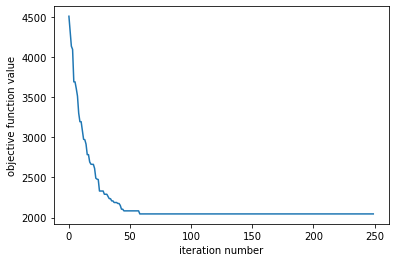

2046.0

In [92]:
# number_of_iterations = 250
SGA(0, 0, 250, 1)

In [94]:
res = np.zeros(5)
for i in range(5):
    res[i] = SGA(0, 0, 250, 0)
print(res, np.mean(res))

[2064. 2123. 2075. 2086. 2087.] 2087.0


### kroA100

In [95]:
n = 100
kroA100_coords = []

with open('kroA100.tsp', 'r') as f:
    for line in f:
        l = line.split()
        kroA100_coords.append(float(l[1]))
        kroA100_coords.append(float(l[2]))

kroA100_coords = np.array(kroA100_coords).reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((kroA100_coords[i, :] - kroA100_coords[j, :])**2).sum())

#### opt_val = 21282.0

  0     0.36456656 139771.55084165 162627.61604207 169480.18603268 5380.30146535
  1     0.70318794 136747.81400292 156855.79788195 163083.62140820 4835.49937559
  2     1.02887964 135541.98688234 152342.21533735 157690.04567354 4324.77966939
  3     1.33114886 133626.25575119 148228.24156738 153376.71560171 4178.57359876
  4     1.66571712 127536.75306235 144970.31823569 149794.62053803 3864.42787058
  5     1.96452785 127536.75306235 141534.11224429 145893.36652754 3205.99438391
  6     2.26450658 123785.69276775 139150.46160756 142953.77575034 3060.99571923
  7     2.56252241 123785.69276775 137222.56487329 140711.34445934 2869.49183854
  8     2.86467528 122100.47516875 135511.46806631 138972.34217679 2861.16790857
  9     3.16537118 121198.93799725 133597.84861535 137173.62512784 2962.64915667
 10     3.46444750 119761.55567165 131743.51123372 135345.25899638 3044.37688725
 11     3.76474595 117764.68994795 129839.59961717 133596.15158916 3105.28395112
 12     4.04793930 116004.34

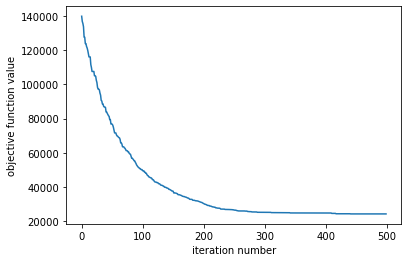

24253.405953179365

In [96]:
# number_of_iterations = 500
SGA(0, 0, 500, 1)

### kroA150

In [98]:
n = 150
kroA150_coords = []

with open('kroA150.tsp', 'r') as f:
    for line in f:
        l = line.split()
        kroA150_coords.append(float(l[1]))
        kroA150_coords.append(float(l[2]))

kroA150_coords = np.array(kroA150_coords).reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((kroA150_coords[i, :] - kroA150_coords[j, :])**2).sum())

#### opt_val = 26524.0

  0     0.53995538 226386.50654857 248169.12907131 256344.49725962 5911.05168735
  1     1.00372553 221544.68313863 242385.97737094 248871.50304492 5195.79205222
  2     1.48974061 220975.79113610 237385.96145604 243424.73407660 4792.35530594
  3     1.94120789 214103.75928960 233331.51584505 238499.87286798 4298.96796512
  4     2.39519167 213002.83756070 229774.84775266 235357.89308300 4304.08335909
  5     2.85081744 210888.41121163 226372.47327152 231587.68039539 4205.22207645
  6     3.32271075 202179.62557676 223264.21091667 228329.90785179 4195.69440750
  7     3.77783513 202179.62557676 220296.83325804 225422.53746885 4059.85508724
  8     4.22467923 202179.62557676 217688.11752398 222687.76582021 3882.32264459
  9     4.67985225 199670.79884070 215329.42680302 220326.26374076 3895.99007394
 10     5.13091397 194354.62063610 213104.26684378 217500.58310884 3773.68242423
 11     5.56068468 194340.16520159 210675.69241784 215339.81886985 3915.30029557
 12     6.00584126 194340.16

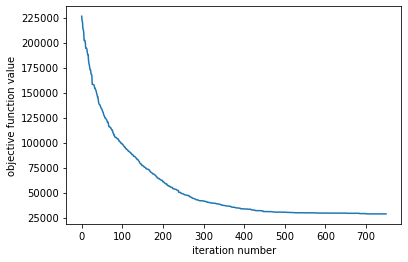

28672.68186312016

In [99]:
# number_of_iterations = 750
SGA(0, 0, 750, 1)

### kroA200

In [100]:
n = 200
kroA200_coords = []

with open('kroA200.tsp', 'r') as f:
    for line in f:
        l = line.split()
        kroA200_coords.append(float(l[1]))
        kroA200_coords.append(float(l[2]))

kroA200_coords = np.array(kroA200_coords).reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((kroA200_coords[i, :] - kroA200_coords[j, :])**2).sum())

#### opt_val = 29368.0

  0     0.72876167 300671.53150771 329192.26983249 338209.44422766 6802.76749214
  1     1.32756972 296483.61097015 321634.22040715 329420.72445961 6223.45558229
  2     1.91938472 292715.54964780 315387.10709287 322970.95932285 6181.76073467
  3     2.51517582 289276.86610886 309660.85883181 316951.53255657 5826.94014937
  4     3.11198521 284550.67227227 305048.32866533 311752.66001766 5144.51059987
  5     3.69381213 274927.09733584 301113.10037875 307178.71493219 4786.70340221
  6     4.28260851 274927.09733584 297765.81222876 303735.64337674 4752.87418803
  7     4.91341949 271881.55589634 294753.07877405 300317.63323224 4701.39153826
  8     5.49923658 271881.55589634 291254.82124667 297191.65419470 5051.89458923
  9     6.10704136 263602.97691185 288144.57499410 294563.47426824 5339.52681535
 10     6.73682165 263602.97691185 284506.92201305 291171.30281217 5181.45179240
 11     7.46458888 260535.73091494 281294.41066230 287210.07317796 4619.50522800
 12     8.14736938 256555.14

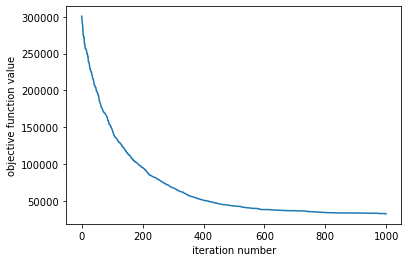

32678.41824955812

In [101]:
# number_of_iterations = 1000
SGA(0, 0, 1000, 1)

## Zadanie 2

In [102]:
def OX(par1, par2):
    
    # creating sequences
    par1_seq = par1
    par2_seq = par2

    
    # randomly selecting separators
    s1_idx = choice([s for s in range(1, n)])
    s2_idx = choice([s for s in range(1, n) if s not in [s1_idx-1, s1_idx, s1_idx+1]])
    if s1_idx > s2_idx:
        s1_idx, s2_idx = s2_idx, s1_idx
    s1 = n
    s2 = n + 1
    par1 = np.insert(par1, s1_idx, s1)
    par1 = np.insert(par1, s2_idx + 1, s2)
    par2 = np.insert(par2, s1_idx, s1)
    par2 = np.insert(par2, s2_idx + 1, s2)
    
    
    #randomly selecting group number
    group = choice([g for g in range(0, 3)])
    
    
    #initializing kids with separators 
    kid1 = np.ones(n) * -1
    kid2 = np.ones(n) * -1
    kid1 = np.insert(kid1, s1_idx, s1)
    kid1 = np.insert(kid1, s2_idx + 1, s2)
    kid2 = np.insert(kid2, s1_idx, s1)
    kid2 = np.insert(kid2, s2_idx + 1, s2)
    
    
    #pmx operations depending on the drawn group
    if group == 0:
        
        #copying group elems
        kid2[:s1_idx] = par1[:s1_idx]
        kid1[:s1_idx] = par2[:s1_idx]

        #deleting sequence elems that are causing conflict
        cop1 = par1[:s1_idx]
        cop2 = par2[:s1_idx]
        par2_seq = [x for x in par2_seq if x not in cop1]
        par1_seq = [x for x in par1_seq if x not in cop2]

        #completing remaining with sequence
        j = 0
        k = 0
        for i in range(s1_idx + 1, n + 2):
            if kid2[i] == -1:
                kid2[i] = par2_seq[j]
                j += 1
            if kid1[i] == -1:
                kid1[i] = par1_seq[k]
                k += 1
        
    elif group == 1:
        
        #copying group elems
        kid2[s1_idx+1:s2_idx+1] = par1[s1_idx+1:s2_idx+1]
        kid1[s1_idx+1:s2_idx+1] = par2[s1_idx+1:s2_idx+1]
        
        #deleting sequence elems that are causing conflict
        cop1 = par1[s1_idx+1:s2_idx+1]
        cop2 = par2[s1_idx+1:s2_idx+1]
        par2_seq = [x for x in par2_seq if x not in cop1]
        par1_seq = [x for x in par1_seq if x not in cop2]

        #completing remaining with sequence
        j = 0
        k = 0
        for i in range(0, s1_idx):
            if kid2[i] == -1:
                kid2[i] = par2_seq[j]
                j += 1
            if kid1[i] == -1:
                kid1[i] = par1_seq[k]
                k += 1

        for i in range(s2_idx + 2, n + 2):
            if kid2[i] == -1:
                kid2[i] = par2_seq[j]
                j += 1
            if kid1[i] == -1:
                kid1[i] = par1_seq[k]
                k += 1
        
    else:
        
        #copying group elems
        kid2[s2_idx+2:] = par1[s2_idx+2:]
        kid1[s2_idx+2:] = par2[s2_idx+2:]

        #deleting sequence elems that are causing conflict
        cop1 = par1[s2_idx+2:]
        cop2 = par2[s2_idx+2:]
        par2_seq = [x for x in par2_seq if x not in cop1]
        par1_seq = [x for x in par1_seq if x not in cop2]

        #completing remaining with sequence
        j = 0
        k = 0
        for i in range(0, s2_idx + 1):
            if kid2[i] == -1:
                kid2[i] = par2_seq[j]
                j += 1
            if kid1[i] == -1:
                kid1[i] = par1_seq[k]
                k += 1
                

    #deleting separators
    kid1 = np.delete(kid1, s1_idx)
    kid1 = np.delete(kid1, s2_idx)
    kid2 = np.delete(kid2, s1_idx)
    kid2 = np.delete(kid2, s2_idx)
    
    return kid1, kid2

In [103]:
def CX(par1, par2):

    #initializing kids with separators 
    kid1 = np.ones(n) * -1
    kid2 = np.ones(n) * -1
    
    idx = 0
    kid1[idx] = par1[idx]  
    match = par2[idx]
    while match not in kid1:
        idx = np.where(par1 == match)
        kid1[idx] = match
        match = par2[idx]
    for i in range(n):
        if kid1[i] == -1:
            kid1[i] = par2[i]
    
    idx = 0
    kid2[idx] = par2[idx]  
    match = par1[idx]
    while match not in kid2:
        idx = np.where(par2 == match)
        kid2[idx] = match
        match = par1[idx]
    for i in range(n):
        if kid2[i] == -1:
            kid2[i] = par1[i]
   
    return kid1, kid2

In [104]:
def k_swaps_mutation(p):
    q = p.copy()
    a = len(p) // 2
    k = np.random.choice(a)
    for r in range(k):
        i, j = np.random.choice(len(p), 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [105]:
def half_mirror_mutation(p):
    q = p.copy()
    h = len(p) // 2
    q[:h] = q[:h][::-1]
    q[h:] = q[h:][::-1]
    return q

### berlin52

In [108]:
# OX, k_swaps
res = np.zeros(5)
for i in range(5):
    res[i] = SGA(1, 2, 250, 0)
print(res, np.mean(res))

[9046.535478   9581.98913288 9747.02827775 9919.66865128 9834.33890232] 9625.912088448926


In [109]:
# OX, half_mirror
res = np.zeros(5)
for i in range(5):
    res[i] = SGA(1, 3, 250, 0)
print(res, np.mean(res))

[9074.05730675 9221.07474956 9359.86055066 8231.39204939 9014.2651867 ] 8980.129968610197


In [122]:
# CX, k_swaps
res = np.zeros(5)
for i in range(5):
    res[i] = SGA(2, 2, 250, 0)
print(res, np.mean(res))

[11442.78656304 11413.2779326  12099.24489171 11515.62602959
 13580.71748472] 12010.33058033044


In [123]:
# CX, half_mirror
res = np.zeros(5)
for i in range(5):
    res[i] = SGA(2, 3, 250, 0)
print(res, np.mean(res))

[17846.37082026 19150.67977556 18232.95677582 16499.91236373
 18498.14623226] 18045.613193523957
